In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam


In [2]:
train_dir = "C:/Users/DELL/Desktop/face mask/Dataset/Train"
validation_dir = "C:/Users/DELL/Desktop/face mask/Dataset/Validation"
test_dir = "C:/Users/DELL/Desktop/face mask/Dataset/Test"


In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [4]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Build the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [5]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)


Epoch 1/5


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1692s 5s/step - accuracy: 0.8851 - loss: 0.4382 - val_accuracy: 0.9837 - val_loss: 0.0413
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1370s 4s/step - accuracy: 0.9601 - loss: 0.1054 - val_accuracy: 0.9950 - val_loss: 0.0259
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1314s 4s/step - accuracy: 0.9683 - loss: 0.0928 - val_accuracy: 0.9925 - val_loss: 0.0209
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1221s 4s/step - accuracy: 0.9692 - loss: 0.0800 - val_accuracy: 0.9962 - val_loss: 0.0186
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1843s 6s/step - accuracy: 0.9758 - loss: 0.0724 - val_accuracy: 0.9912 - val_loss: 0.0251


In [6]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.2f}')


31/31 ━━━━━━━━━━━━━━━━━━━━ 102s 3s/step - accuracy: 0.9984 - loss: 0.0124
Test accuracy: 1.00


In [7]:
model.save('vgg16_custom_model.h5')


In [8]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_image(model, img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    return predicted_class


In [10]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

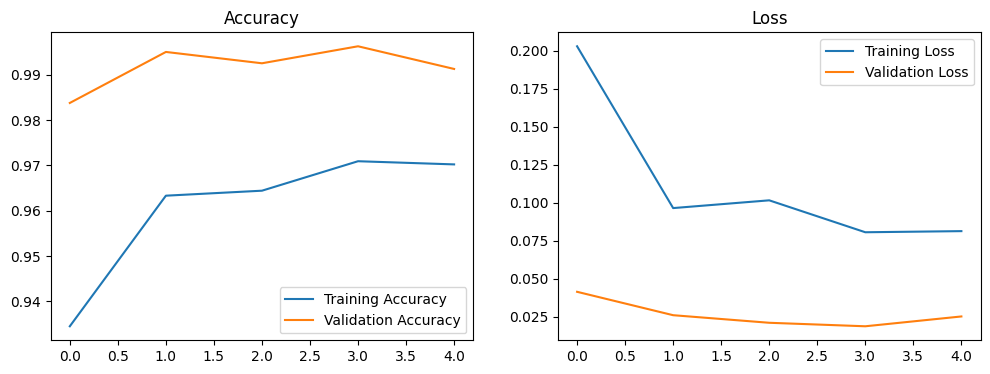

In [12]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

In [13]:
# User input prediction function
def predict_image(model, img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    class_labels = list(train_generator.class_indices.keys())
    return class_labels[predicted_class[0]]

In [ ]:
# Example usage of the prediction function
img_path = "C:/Users/DELL/Desktop/face mask/withmask.webp"
predicted_class = predict_image(model, img_path)
print(f'Predicted class: {predicted_class}')

FileNotFoundError: [Errno 2] No such file or directory: 'path/to/test_image.jpg'